# ASHWIN SURESH (21MIS1174)

# First will load the file to the variable filepath

In [1]:
import pandas as pd
# loading file
filepath = r'C:\Users\praka\21MIS1128\breast-cancer.csv'

# Reading the csv file with the help of 'pandas' library

In [2]:
data=pd.read_csv(filepath)

# First 5 data is displayed.. Pre-processing is not much needed as for prediction and classification User ID and Gender will be discarded.. Remaining values are anyways in numerical form

In [3]:
data.head() # First 5 rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Will analyze what is the size of the dataset

In [4]:
data.shape

(569, 32)

# We need to first check the dataset if any null or empty data is there

In [5]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# We need to classify Features (Age, Salary) and Target (Purchase)

In [6]:
# Now User ID and Gender is not needed for classification
# Extracting Independent and Dependent Variable  
x = data.iloc[:, [2,3]].values  
y = data.iloc[:, 4].values 

# For selecting K value we need to analyse which K value is most suitable. We predict the values and find the mean between predicted and target values (if they aren't matching)

In [7]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    
    error_rate.append(np.mean(pred_i != y_test))

NameError: name 'x_train' is not defined

# We shall prefer K value which has the least error rate, based on the graph here we prefer K = 11

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', markersize=10, markerfacecolor='red', marker='o')
plt.title( 'K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

NameError: name 'plt' is not defined

# Here we start splitting the dataset into training and testing using sklearn library and we split in that ratio of 80:20 where 80 represents training set and 20 testing/validating set

In [13]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state = 0)  

# Feature Scaling is required for reducing the gap/distance between features such as AGE which is likely between 20-60 whereas SALARY between 20000 to 140000 and normalize the features subsequently

In [24]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)  

# As preferred we choose K value as 11 for KNN classification

In [25]:
# Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
model = KNeighborsClassifier(n_neighbors = 11, weights='distance')  
model.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=11, weights='distance')

# The prediction model produces a set of predicted values in an array

In [26]:
# Based on the trained model predicting the target column
y_pred = model.predict(x_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

# To classify the result we use confusion matrix and classification report

In [27]:
# Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix, classification_report  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

# The classification report contains Precision, Recall, F1-Score, Accuracy, etc.

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



# Importing MATLAB plotting libraries for graphical representation

In [18]:
import matplotlib.pyplot as plt    # from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
pip install seaborn

# It is better to visualize the confusion matrix as heatmap for better clarity

<Axes: >

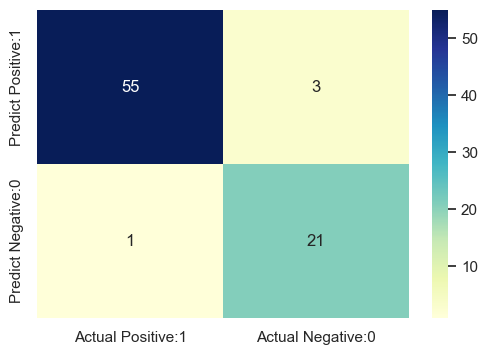

In [29]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Even though we know that we have two sets of Target, we shall calculate

In [30]:
from sklearn.cluster import KMeans
# finding wcss value for different number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

# Elbow Point Graph gives us graphical representation of number of clusters, as known one of the points is 2 (Yes or No)

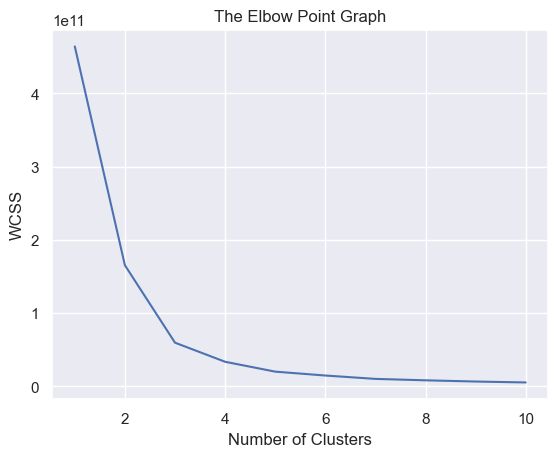

In [31]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Now we visualize th two clusters and plot them for better understanding

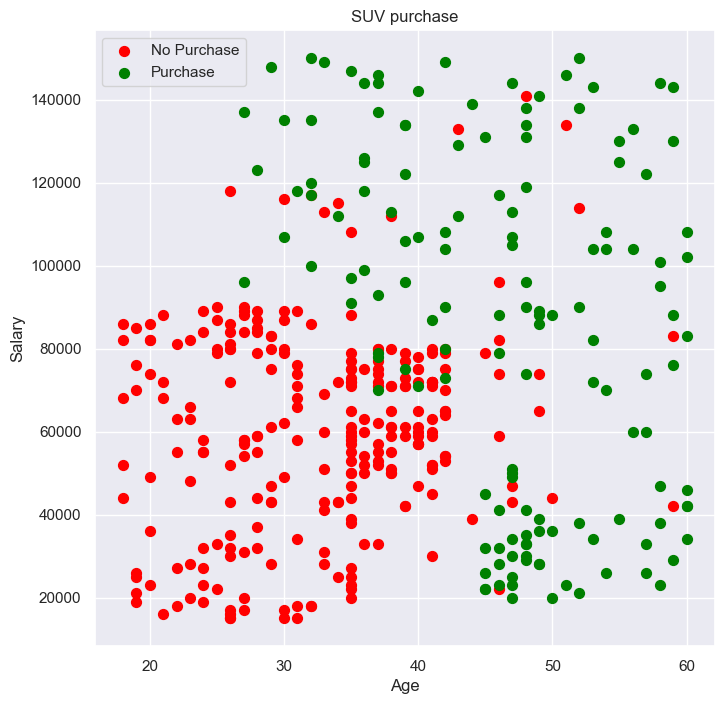

In [32]:
# plotting all the clusters
plt.figure(figsize=(8, 8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, color='red', label='No Purchase')
plt.scatter(x[y==1,0], x[y==1,1], s=50, color='green', label='Purchase')

plt.title('SUV purchase')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [33]:
print( 'Training set score: {: .4f}'.format(model.score(x_train, y_train)))
print( 'Test set score: {: .4f}'.format(model.score(x_test, y_test)))

Training set score:  0.9969
Test set score:  0.9500


# Final interpretation